In [11]:
#from shapely import wkt
#import networkx as nx

import pandas as pd
import numpy as np
import math
import sys
import os

import matplotlib.pyplot as plt
#import geopandas as gpd

# Local imports
from global_config import config

data_dir    = config.get_property('covid_fb')

# Reads the parameters from excecution
location_name        =  'bogota'   # sys.argv[1] # location name # bogota
agglomeration_folder =  'geometry' # sys.argv[2] # agglomeration name #

polygonspop_path = os.path.join(data_dir, "agglomerated", agglomeration_folder, "polygons_pop.csv")
movement_path = os.path.join(data_dir,    "agglomerated", agglomeration_folder, "movement.csv")
polygons_path = os.path.join(data_dir,    "agglomerated", agglomeration_folder, "polygons.csv")
cases_path    = os.path.join(data_dir,    "agglomerated", agglomeration_folder, "cases.csv")


dict_correct = {'Los Martires': 'Los Mártires', 'Fontibon': 'Fontibón', 'Engativa': 'Engativá',
                            'San Cristobal': 'San Cristóbal', 'Usaquen': 'Usaquén',
                            'Ciudad Bolivar': 'Ciudad Bolívar', 'Candelaria': 'La Candelaria'}



<ipython-input-13-a06f39868612>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels([df_deaths_hm.keys()[min(int(i), len(df_deaths_hm.keys())-1) ].strftime('%b-%y') for i in xt])


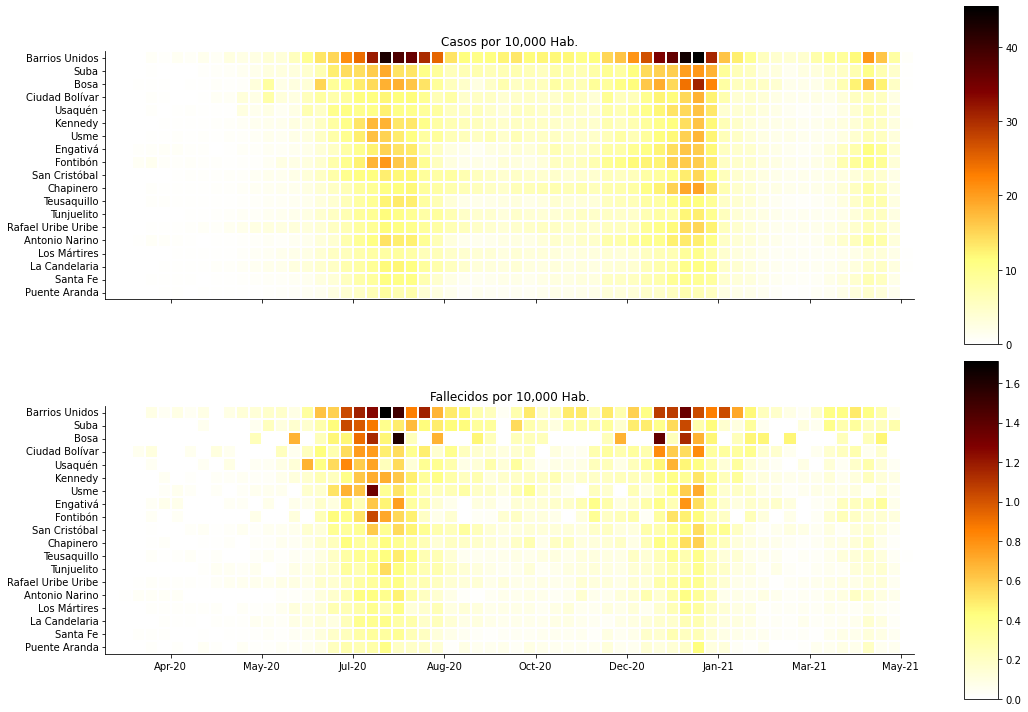

In [13]:
# Load Polygons
df_polygons = pd.read_csv(polygons_path)
df_polygons_pop = pd.read_csv(polygonspop_path).set_index('poly_id')

df_polygons["deaths_per10000"] = df_polygons.apply(lambda x: x["num_diseased"] * 10000 / df_polygons_pop.loc[x.poly_id]["population"], axis=1)
df_polygons = df_polygons.sort_values(by='deaths_per10000')
df_polygons["poly_name"] = df_polygons["poly_id"].map(lambda x: ' '.join([w.capitalize() for w in x.replace('colombia_bogota_localidad_', '').split('_')])).replace(dict_correct)

# Load cases
df_cases = pd.read_csv(cases_path, parse_dates=["date_time"])
df_cases = df_cases.groupby(['poly_id', 'date_time'] ).sum().unstack([0]).resample('W-Sun').agg('sum').stack()[["num_cases", "num_diseased"]].reset_index().set_index('date_time')
df_cases["poly_name"] = df_cases["poly_id"].map(lambda x: ' '.join([w.capitalize() for w in x.replace('colombia_bogota_localidad_', '').split('_')])).replace(dict_correct)
df_cases = df_cases[["poly_id", "poly_name", "num_cases", "num_diseased"]]
df_cases["cases_per10000"]  = df_cases.apply(lambda x: x["num_cases"] * 10000 / df_polygons_pop.loc[x.poly_id]["population"], axis=1)
df_cases["deaths_per10000"] = df_cases.apply(lambda x: x["num_diseased"] * 10000 / df_polygons_pop.loc[x.poly_id]["population"], axis=1)

df_cases_hm = pd.pivot(df_cases.reset_index(), index='poly_name', columns='date_time', values='cases_per10000'); df_cases_hm = df_cases_hm.loc[df_polygons.poly_name]
df_deaths_hm = pd.pivot(df_cases.reset_index(), index='poly_name', columns='date_time', values='deaths_per10000'); df_deaths_hm = df_deaths_hm.loc[df_polygons.poly_name]



In [49]:

data_col_path = '/Users/chaosdonkey06/Dropbox/covid_fb/data/data_stages/colombia'
movement_path = os.path.join(data_col_path,    "agglomerated", agglomeration_folder, "movement.csv")
polygons_path = os.path.join(data_col_path,    "agglomerated", agglomeration_folder, "polygons.csv")
cases_path    = os.path.join(data_col_path,    "agglomerated", agglomeration_folder, "cases.csv")



df_polygons = pd.read_csv(polygons_path)
df_polygons["deaths_per10000"] = df_polygons.apply(lambda x: x["num_diseased"] * 10000 /x["attr_population"], axis=1)
df_polygons = df_polygons.sort_values(by='deaths_per10000')
df_polygons = df_polygons.set_index('poly_id')

# Load cases
df_cases = pd.read_csv(cases_path, parse_dates=["date_time"])
df_cases["poly_name"] = df_cases["location"]
df_cases = df_cases.groupby(['poly_id', 'poly_name', 'date_time'] ).sum().unstack([0,1]).resample('W-Sun').agg('sum').stack().stack()[["num_cases", "num_diseased"]].reset_index().set_index('date_time')


In [51]:
df_polygons

,attr_area,geometry,attr_population,poly_name,poly_lon,poly_lat,attr_time-delay_dist_mix,attr_time_death-delay_dist_mix,num_cases,num_diseased,num_recovered,num_infected,num_infected_in_hospital,num_infected_in_house,deaths_per10000
poly_id,,,,,,,,,,,,,,,
5467,9.560439e+07,POLYGON ((-7277706.747949257 771810.0728607954...,5825.0,Montebello-Antioquia,-75.531677,5.930513,NaN,NaN,143.0,0.0,0.0,143.0,1.0,142.0,0.000000
19693,4.246333e+08,POLYGON ((-7387845.241537443 253085.3427047658...,14314.0,San Sebastián-Cauca,-76.716308,1.855313,NaN,NaN,68.0,0.0,0.0,67.0,1.0,66.0,0.000000
5038,3.176739e+08,POLYGON ((-7248830.140895868 892872.8359450396...,11040.0,Angostura-Antioquia,-75.355267,6.865185,NaN,NaN,55.0,0.0,0.0,55.0,1.0,54.0,0.000000
25258,1.336716e+08,POLYGON ((-7157032.091003686 683062.4006934335...,4775.0,El Peñón-Cundinamarca,-74.308848,5.262423,NaN,NaN,15.0,0.0,0.0,14.0,2.0,12.0,0.000000
25299,1.075722e+08,POLYGON ((-7089563.377313809 614347.3744220545...,4045.0,Gama-Cundinamarca,-73.600492,4.723635,NaN,NaN,40.0,0.0,0.0,39.0,0.0,39.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8832,1.761878e+08,POLYGON ((-7221218.450485739 1401983.731969049...,11017.0,Tubará-Atlántico,-74.982812,10.906078,0.0|0.009480809466059996|0.025831497514958394|...,0.0|0.003695489904954981|0.010647677758328325|...,1028.0,52.0,0.0,969.0,2.0,967.0,47.199782
91001,6.164477e+09,POLYGON ((-6738862.317773342 -385925.317395391...,42280.0,Leticia-Amazonas,-70.041422,-3.533571,0.0|0.00023217846884172137|0.00230572556465461...,0.0|0.006039936901805295|0.01139284132116965|0...,5825.0,214.0,0.0,5521.0,66.0,5455.0,50.614948
76306,2.697555e+08,POLYGON ((-7331644.416152564 491155.1911117042...,21617.0,Ginebra-Valle del Cauca,-76.190646,3.744684,0.0|5.968708206953402e-05|0.001208419020008896...,0.0|0.0037499486315020407|0.008809393333128919...,2572.0,113.0,0.0,2441.0,24.0,2417.0,52.273673


In [52]:

df_cases = df_cases[["poly_id", "poly_name", "num_cases", "num_diseased"]]
df_cases["cases_per10000"]  = df_cases.apply(lambda x: x["num_cases"] * 10000 / df_polygons.loc[x.poly_id]["attr_population"], axis=1)
df_cases["deaths_per10000"] = df_cases.apply(lambda x: x["num_diseased"] * 10000 / df_polygons.loc[x.poly_id]["attr_population"], axis=1)


df_cases_hm = pd.pivot(df_cases.reset_index(), index='poly_name', columns='date_time', values='cases_per10000'); df_cases_hm = df_cases_hm.loc[df_polygons.poly_name]
df_deaths_hm = pd.pivot(df_cases.reset_index(), index='poly_name', columns='date_time', values='deaths_per10000'); df_deaths_hm = df_deaths_hm.loc[df_polygons.poly_name]
df_cases_hm


date_time,2020-03-08,2020-03-15,2020-03-22,2020-03-29,2020-04-05,2020-04-12,2020-04-19,2020-04-26,2020-05-03,2020-05-10,...,2021-03-14,2021-03-21,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16
poly_name,,,,,,,,,,,,,,,,,,,,,
Montebello-Antioquia,0.0,0.0,0.0,1.716738,3.433476,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.716738,1.716738,10.300429,12.017167,15.450644,17.167382,22.317597,10.300429,6.866953
San Sebastián-Cauca,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angostura-Antioquia,0.0,0.0,0.0,0.000000,0.000000,0.905797,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.905797,0.000000,0.000000,0.000000,0.000000,4.528986,0.905797
El Peñón-Cundinamarca,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.094241,0.000000,2.094241,2.094241,0.000000,0.000000,0.000000
Gama-Cundinamarca,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.888752,7.416564,7.416564,9.888752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tubará-Atlántico,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.615322,49.015158,20.876827,46.292094,58.999728,44.476718,46.292094,46.292094,42.661342,31.769084
Leticia-Amazonas,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.946074,8.987701,34.058657,82.071902,...,58.420057,35.004730,13.008515,15.846736,14.664144,10.406812,6.622517,6.859035,18.448439,2.838221
Ginebra-Valle del Cauca,0.0,0.0,0.0,0.000000,0.000000,0.462599,0.000000,0.000000,0.000000,0.000000,...,0.462599,0.000000,0.925198,3.700791,3.238192,5.088588,6.938983,9.251978,4.163390,3.700791


In [53]:
df_cases_hm.tail(20)

date_time,2020-03-08,2020-03-15,2020-03-22,2020-03-29,2020-04-05,2020-04-12,2020-04-19,2020-04-26,2020-05-03,2020-05-10,...,2021-03-14,2021-03-21,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16
poly_name,,,,,,,,,,,,,,,,,,,,,
Los Patios-Norte de Santander,0.0,0.000000,0.000000,0.126026,0.126026,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.638332,3.276664,1.890383,1.386281,5.419098,7.939609,4.914996,6.805379,10.586145,7.939609
Sabaneta-Antioquia,0.0,0.000000,0.000000,0.556452,0.556452,0.556452,0.000000,0.000000,0.000000,0.000000,...,16.322594,25.967763,38.580676,48.411329,83.653293,72.709736,58.056498,36.354868,35.612932,14.653238
Armenia-Quindio,0.0,0.000000,0.165988,0.265581,0.066395,0.564360,0.165988,0.099593,0.132791,0.099593,...,13.279066,13.279066,18.192321,21.445692,28.682783,31.172608,30.409062,23.205168,24.798656,13.511450
Girardot-Cundinamarca,0.0,0.000000,0.000000,0.000000,0.000000,0.093617,0.000000,0.000000,0.000000,0.000000,...,2.621281,2.434047,4.212773,5.710648,9.361718,14.697897,13.574491,17.600030,13.948960,9.548952
Cúcuta-Norte de Santander,0.0,0.014948,0.089691,0.089691,0.119588,0.239175,0.224227,0.029897,0.224227,0.119588,...,1.704122,2.361854,3.109276,2.705668,6.681954,6.786593,7.608757,6.308243,8.849478,9.118550
Baranoa-Atlántico,0.0,0.000000,0.000000,0.000000,0.000000,0.335790,0.000000,0.000000,0.167895,1.343161,...,8.058965,19.475832,24.176894,38.615873,70.515942,52.886956,75.217004,49.361159,60.442236,34.754286
Neiva-Huila,0.0,0.201438,0.086331,0.143884,0.460430,0.431653,0.402877,0.143884,0.748199,0.230215,...,4.892072,4.460419,5.237395,6.791347,12.575503,10.561121,13.064711,13.323703,15.136647,10.762559
Bucaramanga-Santander,0.0,0.018915,0.018915,0.075660,0.037830,0.113490,0.037830,0.075660,0.000000,0.000000,...,5.977117,5.334009,6.393245,8.492802,18.063755,24.948788,31.720331,43.882629,49.122064,44.242013
Suan-Atlántico,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.180638,12.987013,15.348288,23.612751,21.251476,62.573790,31.877214,44.864227,59.031877,14.167651


In [ ]:

df_cases = df_cases[["poly_id", "poly_name", "num_cases", "num_diseased"]]
df_cases["cases_per10000"]  = df_cases.apply(lambda x: x["num_cases"] * 10000 / df_polygons_pop.loc[x.poly_id]["population"], axis=1)
df_cases["deaths_per10000"] = df_cases.apply(lambda x: x["num_diseased"] * 10000 / df_polygons_pop.loc[x.poly_id]["population"], axis=1)

df_cases_hm = pd.pivot(df_cases.reset_index(), index='poly_name', columns='date_time', values='cases_per10000'); df_cases_hm = df_cases_hm.loc[df_polygons.poly_name]
df_deaths_hm = pd.pivot(df_cases.reset_index(), index='poly_name', columns='date_time', values='deaths_per10000'); df_deaths_hm = df_deaths_hm.loc[df_polygons.poly_name]


In [18]:



from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker



fig, axes = plt.subplots(2, 1, figsize=(15.7, 10), sharex=True)
im1 = axes[0].pcolormesh(df_cases_hm, cmap='afmhot_r',  edgecolor='w', shading='auto')
fig.colorbar(im1, ax=axes[0],  aspect=10)

im2 = axes[1].pcolormesh(df_deaths_hm, cmap='afmhot_r',  edgecolor='w', shading='auto')
fig.colorbar(im2, ax=axes[1],  aspect=10)

axes[0].set_title('Casos por 10,000 Hab.')
axes[1].set_title('Fallecidos por 10,000 Hab.')


axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

#axes[0].xaxis.set_major_locator(mdates.MonthLocator())
##axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
axes[0].xaxis.set_minor_locator(mdates.WeekdayLocator())
axes[0].xaxis.set_major_locator(mdates.WeekdayLocator())

#axes[1].xaxis.set_major_locator(mdates.MonthLocator())
##axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
axes[1].xaxis.set_minor_locator(mdates.WeekdayLocator())
axes[1].xaxis.set_major_locator(mdates.WeekdayLocator())

xt = axes[1].get_xticks()
axes[1].set_xticklabels([df_deaths_hm.keys()[min(int(i), len(df_deaths_hm.keys())-1) ].strftime('%b-%y') for i in xt])

axes[0].set_yticks([len(df_cases_hm.index.values)-1 - idx + 0.5 for idx, loc in enumerate(df_cases_hm.index.values)])
axes[0].set_yticklabels([loc for loc in df_cases_hm.index.values], rotation='horizontal',
                    va='center')

axes[1].set_yticks( [len(df_cases_hm.index.values)-1 - idx + 0.5 for idx, loc in enumerate(df_cases_hm.index.values)] )
axes[1].set_yticklabels([loc for loc in df_cases_hm.index.values], rotation='horizontal',
                    va='center')
plt.tight_layout()
#fig.savefig(os.path.join(out_folder, 'cases_deaths_hm.png'), dpi=400, transà)

